# EDA Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.figsize'] = [12,6] # Run time configuration to set the figure size for matplotlib
import warnings
warnings.filterwarnings('ignore')# To ignore warning, this code would never let the warnings to be printed
from sklearn.preprocessing import LabelEncoder # Just in case the output variable is in string form
lb = LabelEncoder() # Also if independent variables are in string format, encode those ones as well
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head(18)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
data.tail(18)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12312,7,150.357143,1,9.0,221,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True
12313,3,16.000000,3,86.0,15,2773.500000,0.000000,0.030000,78.811725,0.0,Dec,2,2,1,2,Returning_Visitor,False,True
12314,0,0.000000,0,0.0,7,705.833333,0.028571,0.085714,0.000000,0.0,Dec,5,11,4,1,Returning_Visitor,True,False
12315,0,0.000000,0,0.0,7,212.500000,0.000000,0.033333,0.000000,0.0,Nov,3,2,1,11,Returning_Visitor,True,False
12316,0,0.000000,0,0.0,44,615.000000,0.013636,0.036364,0.000000,0.0,Dec,4,1,3,1,Returning_Visitor,False,False
12317,3,100.500000,0,0.0,95,1453.640882,0.002105,0.012761,0.000000,0.0,Dec,2,2,3,2,New_Visitor,False,False
12318,0,0.000000,0,0.0,6,279.000000,0.000000,0.033333,0.000000,0.0,Dec,1,2,3,10,Returning_Visitor,True,False
12319,0,0.000000,0,0.0,21,1128.583333,0.000000,0.013043,3.685401,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
12320,0,0.000000,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12321,0,0.000000,0,0.0,6,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,8,4,1,Returning_Visitor,False,False


In [5]:
data.shape

(12330, 18)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
data.describe().T # T is for transposing, gives a relatively better view, may be subjective.

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [8]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:

data.tail(30)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12300,0,0.000000,0,0.00,9,719.583333,0.022222,0.055556,0.000000,0.0,Nov,2,4,4,2,Returning_Visitor,False,False
12301,0,0.000000,0,0.00,2,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,1,4,1,Returning_Visitor,False,False
12302,0,0.000000,0,0.00,22,185.250000,0.021212,0.075758,0.000000,0.0,Nov,2,7,1,1,Returning_Visitor,True,False
12303,0,0.000000,0,0.00,3,172.000000,0.000000,0.066667,0.000000,0.0,Dec,2,13,9,20,Returning_Visitor,False,False
12304,0,0.000000,0,0.00,30,655.542857,0.006667,0.019667,0.000000,0.0,Dec,3,2,1,2,Returning_Visitor,True,False
12305,0,0.000000,0,0.00,39,1168.619841,0.000000,0.009064,0.000000,0.0,Nov,1,1,4,3,Returning_Visitor,False,False
12306,0,0.000000,0,0.00,13,1041.750000,0.018182,0.027273,0.000000,0.0,Dec,2,2,5,2,Returning_Visitor,False,False
12307,2,305.125000,3,368.25,27,1121.250000,0.020000,0.042857,39.519807,0.0,Dec,3,2,1,2,Returning_Visitor,False,False
12308,1,19.000000,0,0.00,45,4018.450000,0.009091,0.021970,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,True,False
12309,3,54.000000,0,0.00,20,262.900000,0.008333,0.055556,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


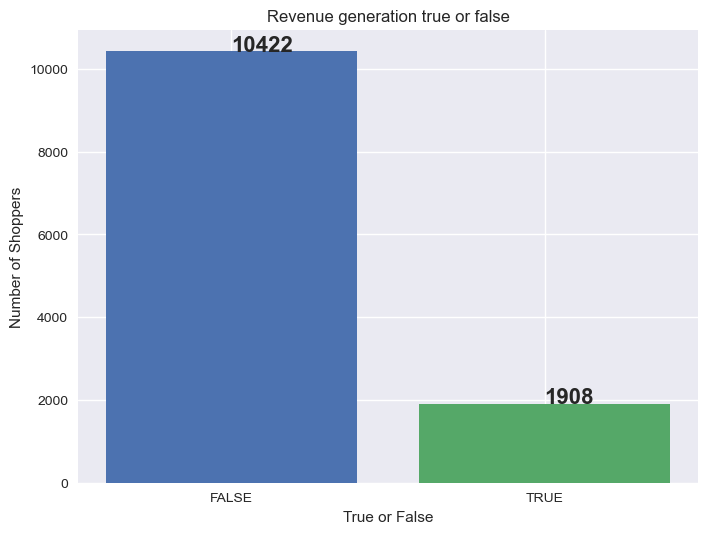

In [10]:
Rfalse = data['Revenue'].value_counts()[0]
Rtrue = data['Revenue'].value_counts()[1]
text = ["FALSE","TRUE"]
label = [Rfalse, Rtrue]
plt.style.use('seaborn')
plt.figure(figsize=(8,6),dpi=100)
for bar in range(0,2):
    plt.bar(text[bar],label[bar])
    plt.text(text[bar],label[bar],str(label[bar]),fontsize=16, fontweight='bold')
plt.title("Revenue generation true or false")
plt.xlabel("True or False")
plt.ylabel("Number of Shoppers")
plt.show()

In [11]:
print(data['Revenue'].value_counts(normalize=True)*100)# This gives us the percentage of each value type.

False    84.525547
True     15.474453
Name: Revenue, dtype: float64


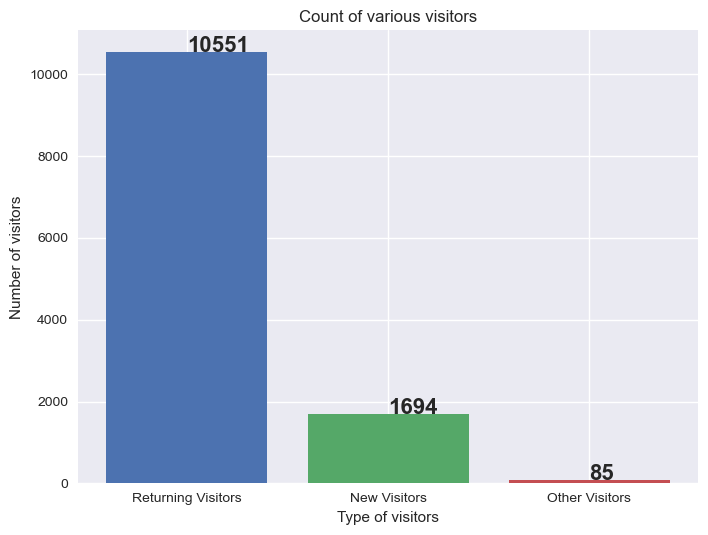

In [12]:
rt = data['VisitorType'].value_counts()['Returning_Visitor']
nt = data['VisitorType'].value_counts()['New_Visitor']
ot = data['VisitorType'].value_counts()['Other']
text = ["Returning Visitors","New Visitors","Other Visitors"]
label = [rt,nt,ot]
plt.style.use('seaborn')
plt.figure(figsize=(8,6),dpi=100)
for bar in range(0,3):
    plt.bar(text[bar],label[bar])
    plt.text(text[bar],label[bar],str(label[bar]),fontsize=16, fontweight='bold')
plt.title("Count of various visitors")
plt.xlabel("Type of visitors")
plt.ylabel("Number of visitors")
plt.show()

In [13]:
print(data['VisitorType'].value_counts(normalize=True)*100)# This gives us the percentage of each visitor

Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: VisitorType, dtype: float64


array([[<AxesSubplot:title={'center':'Administrative'}>,
        <AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>],
       [<AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'SpecialDay'}>,
        <AxesSubplot:title={'center':'OperatingSystems'}>,
        <AxesSubplot:title={'center':'Browser'}>],
       [<AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'TrafficType'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

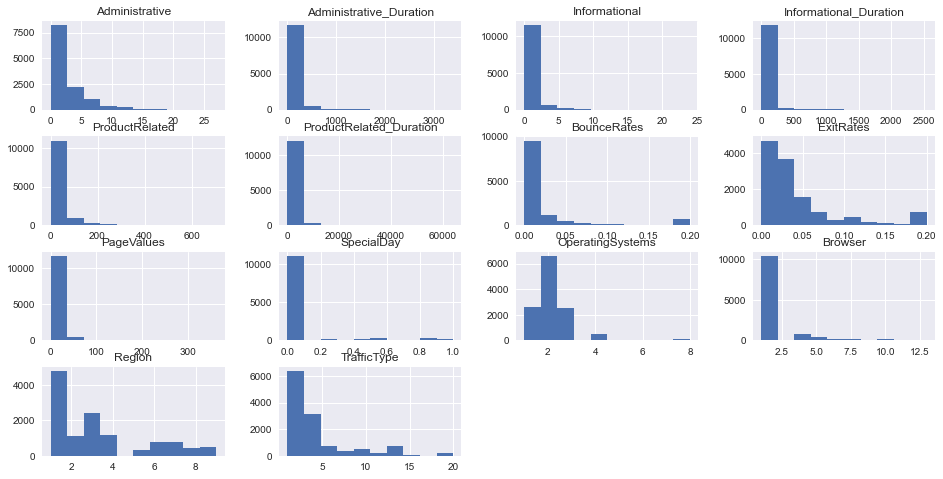

In [14]:
data.hist(figsize=(16,8))


In [15]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Defining a function to print count plots for all the variables.

In [16]:
def plot_data_count(data, col, return_pct_share=True, hue=None, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=data, x=col, hue=hue)
    for rect in g.patches:# This for loop gets the dimensions of all the bars in the count plots
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
#Annotation has been done to add text at relevant positions in the bars 
    plt.show()
    
    if return_pct_share:# Since return pct share is true by default, it will always give the percentage count
        print("\n")
        print("Percent share for each category:")
        print(data[col].value_counts(normalize=True)*100)# This line print's the percentage value of each category in this field

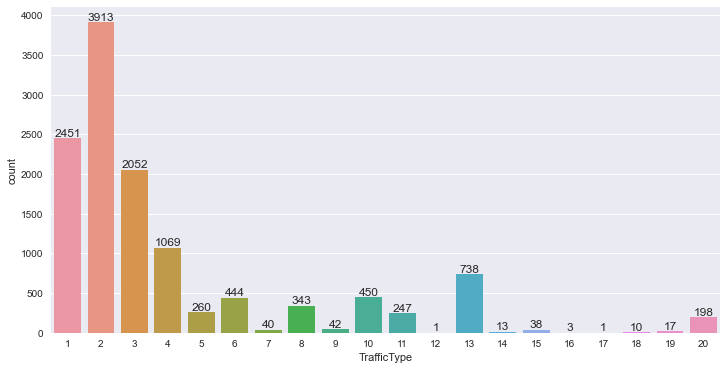



Percent share for each category:
2     31.735604
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6      3.600973
8      2.781833
5      2.108678
11     2.003244
20     1.605839
9      0.340633
7      0.324412
15     0.308191
19     0.137875
14     0.105434
18     0.081103
16     0.024331
12     0.008110
17     0.008110
Name: TrafficType, dtype: float64


In [17]:
plot_data_count(data, 'TrafficType')



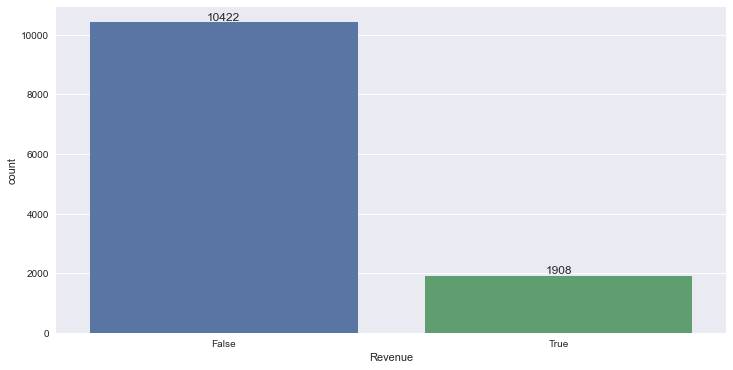



Percent share for each category:
False    84.525547
True     15.474453
Name: Revenue, dtype: float64


In [18]:
plot_data_count(data, 'Revenue')

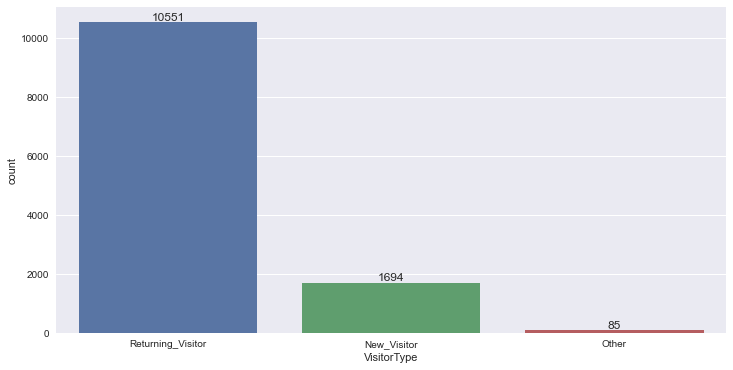



Percent share for each category:
Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: VisitorType, dtype: float64


In [19]:
plot_data_count(data, 'VisitorType')

In [20]:
pd.crosstab(data['Revenue'], data['Region'])

Region,1,2,3,4,5,6,7,8,9
Revenue,,,,,,,,,
False,4009,948,2054,1007,266,693,642,378,425
True,771,188,349,175,52,112,119,56,86


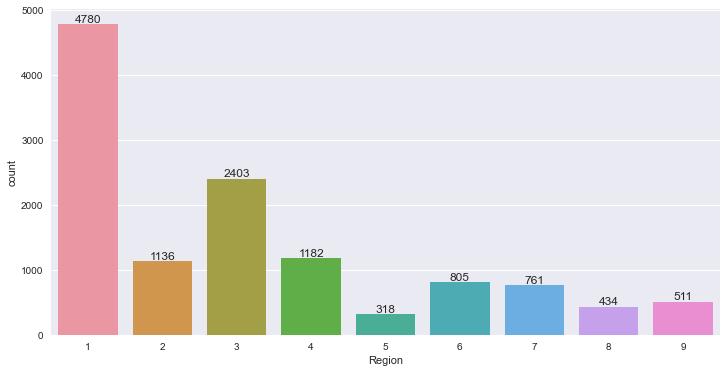



Percent share for each category:
1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: Region, dtype: float64


In [21]:
plot_data_count(data, 'Region')

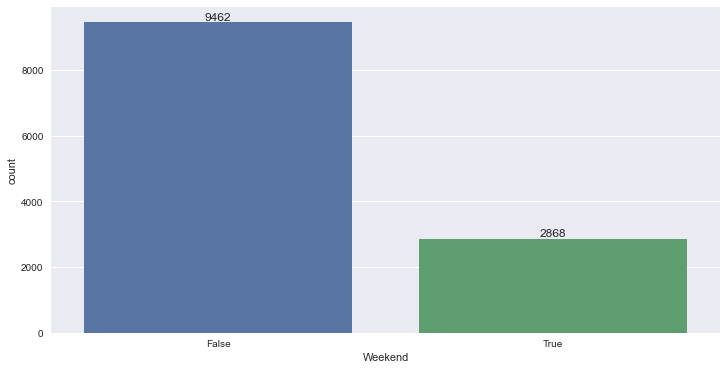



Percent share for each category:
False    76.739659
True     23.260341
Name: Weekend, dtype: float64


In [22]:
plot_data_count(data, 'Weekend')

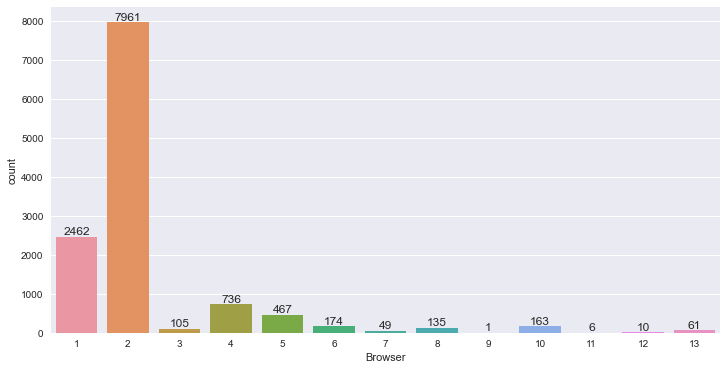



Percent share for each category:
2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: Browser, dtype: float64


In [23]:
plot_data_count(data, 'Browser')

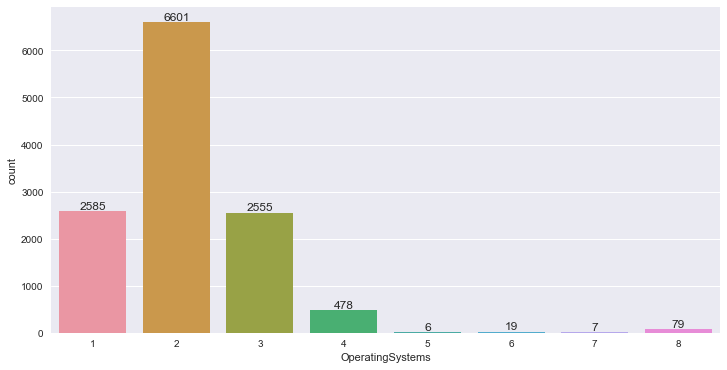



Percent share for each category:
2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: OperatingSystems, dtype: float64


In [24]:
plot_data_count(data, 'OperatingSystems')

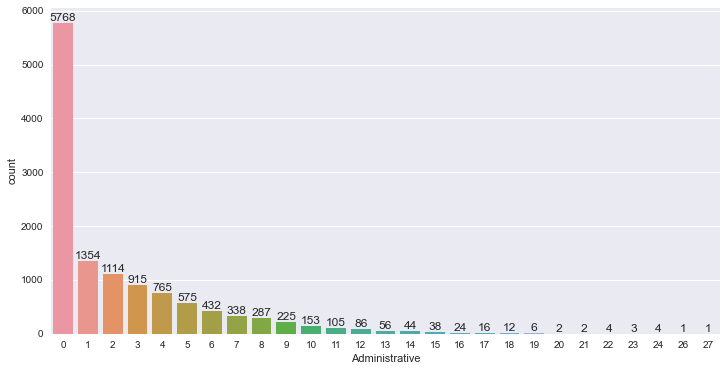



Percent share for each category:
0     46.780211
1     10.981346
2      9.034874
3      7.420925
4      6.204380
5      4.663423
6      3.503650
7      2.741281
8      2.327656
9      1.824818
10     1.240876
11     0.851582
12     0.697486
13     0.454177
14     0.356853
15     0.308191
16     0.194647
17     0.129765
18     0.097324
19     0.048662
22     0.032441
24     0.032441
23     0.024331
21     0.016221
20     0.016221
27     0.008110
26     0.008110
Name: Administrative, dtype: float64


In [25]:
plot_data_count(data, 'Administrative')

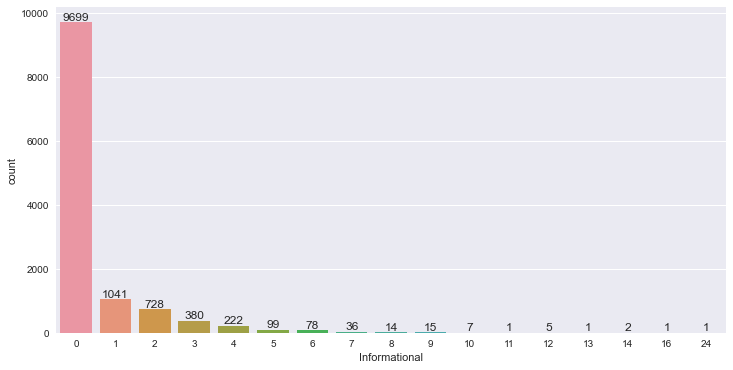



Percent share for each category:
0     78.661800
1      8.442822
2      5.904298
3      3.081914
4      1.800487
5      0.802920
6      0.632603
7      0.291971
9      0.121655
8      0.113544
10     0.056772
12     0.040552
14     0.016221
24     0.008110
16     0.008110
11     0.008110
13     0.008110
Name: Informational, dtype: float64


In [26]:
plot_data_count(data, 'Informational')

In [27]:
pd.crosstab(data['Revenue'], data['SpecialDay'])

SpecialDay,0.0,0.2,0.4,0.6,0.8,1.0
Revenue,,,,,,
False,9248,164,230,322,314,144
True,1831,14,13,29,11,10


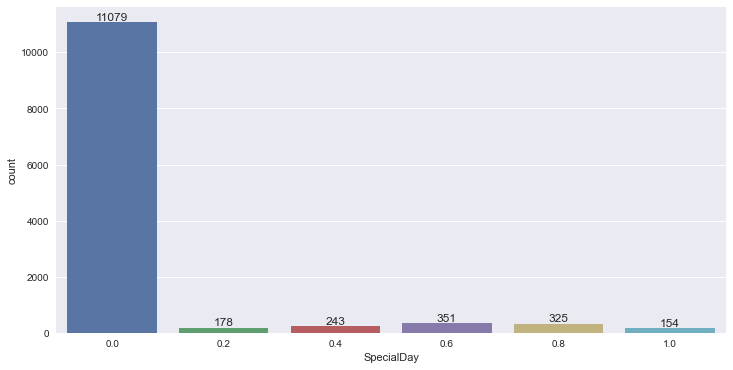



Percent share for each category:
0.0    89.854015
0.6     2.846715
0.8     2.635848
0.4     1.970803
0.2     1.443633
1.0     1.248986
Name: SpecialDay, dtype: float64


In [28]:
plot_data_count(data, 'SpecialDay')

In [29]:
continuous_features = ['Administrative_Duration', 
                       'Informational_Duration', 
                       'ProductRelated_Duration', 
                       'BounceRates', 
                       'ExitRates', 
                       'PageValues']


<AxesSubplot:xlabel='Administrative_Duration', ylabel='Count'>

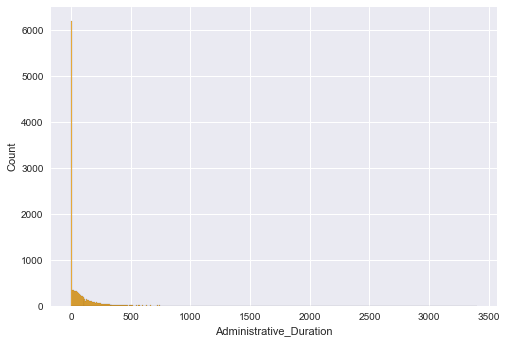

In [30]:

sns.histplot(data[continuous_features[0]],color='orange')

<AxesSubplot:xlabel='Informational_Duration', ylabel='Count'>

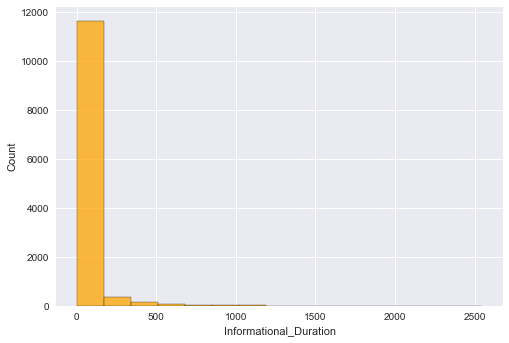

In [31]:
sns.histplot(data[continuous_features[1]],color='orange')

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Count'>

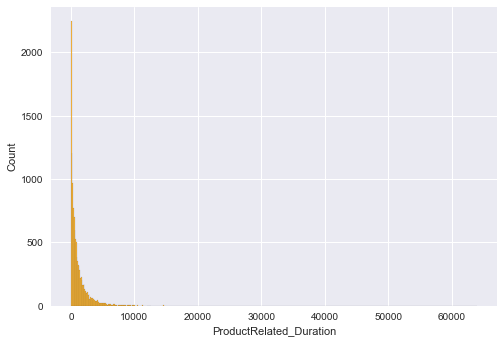

In [32]:
sns.histplot(data[continuous_features[2]],color='orange')

<AxesSubplot:xlabel='BounceRates', ylabel='Count'>

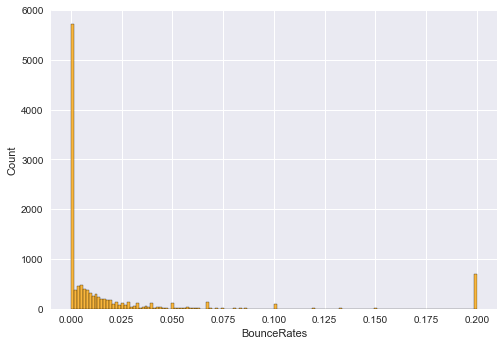

In [33]:
sns.histplot(data[continuous_features[3]],color='orange')

<AxesSubplot:xlabel='ExitRates', ylabel='Count'>

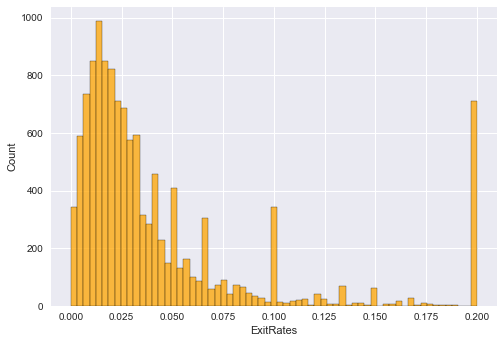

In [34]:
sns.histplot(data[continuous_features[4]],color='orange')

<AxesSubplot:xlabel='PageValues', ylabel='Count'>

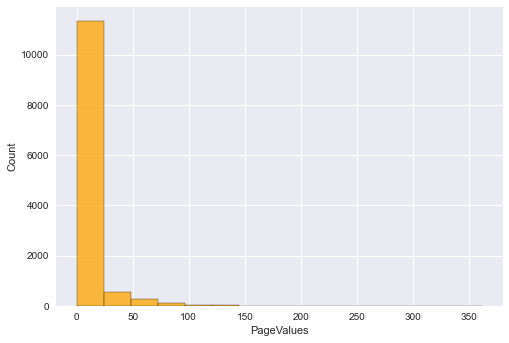

In [35]:
sns.histplot(data[continuous_features[5]],color='orange')

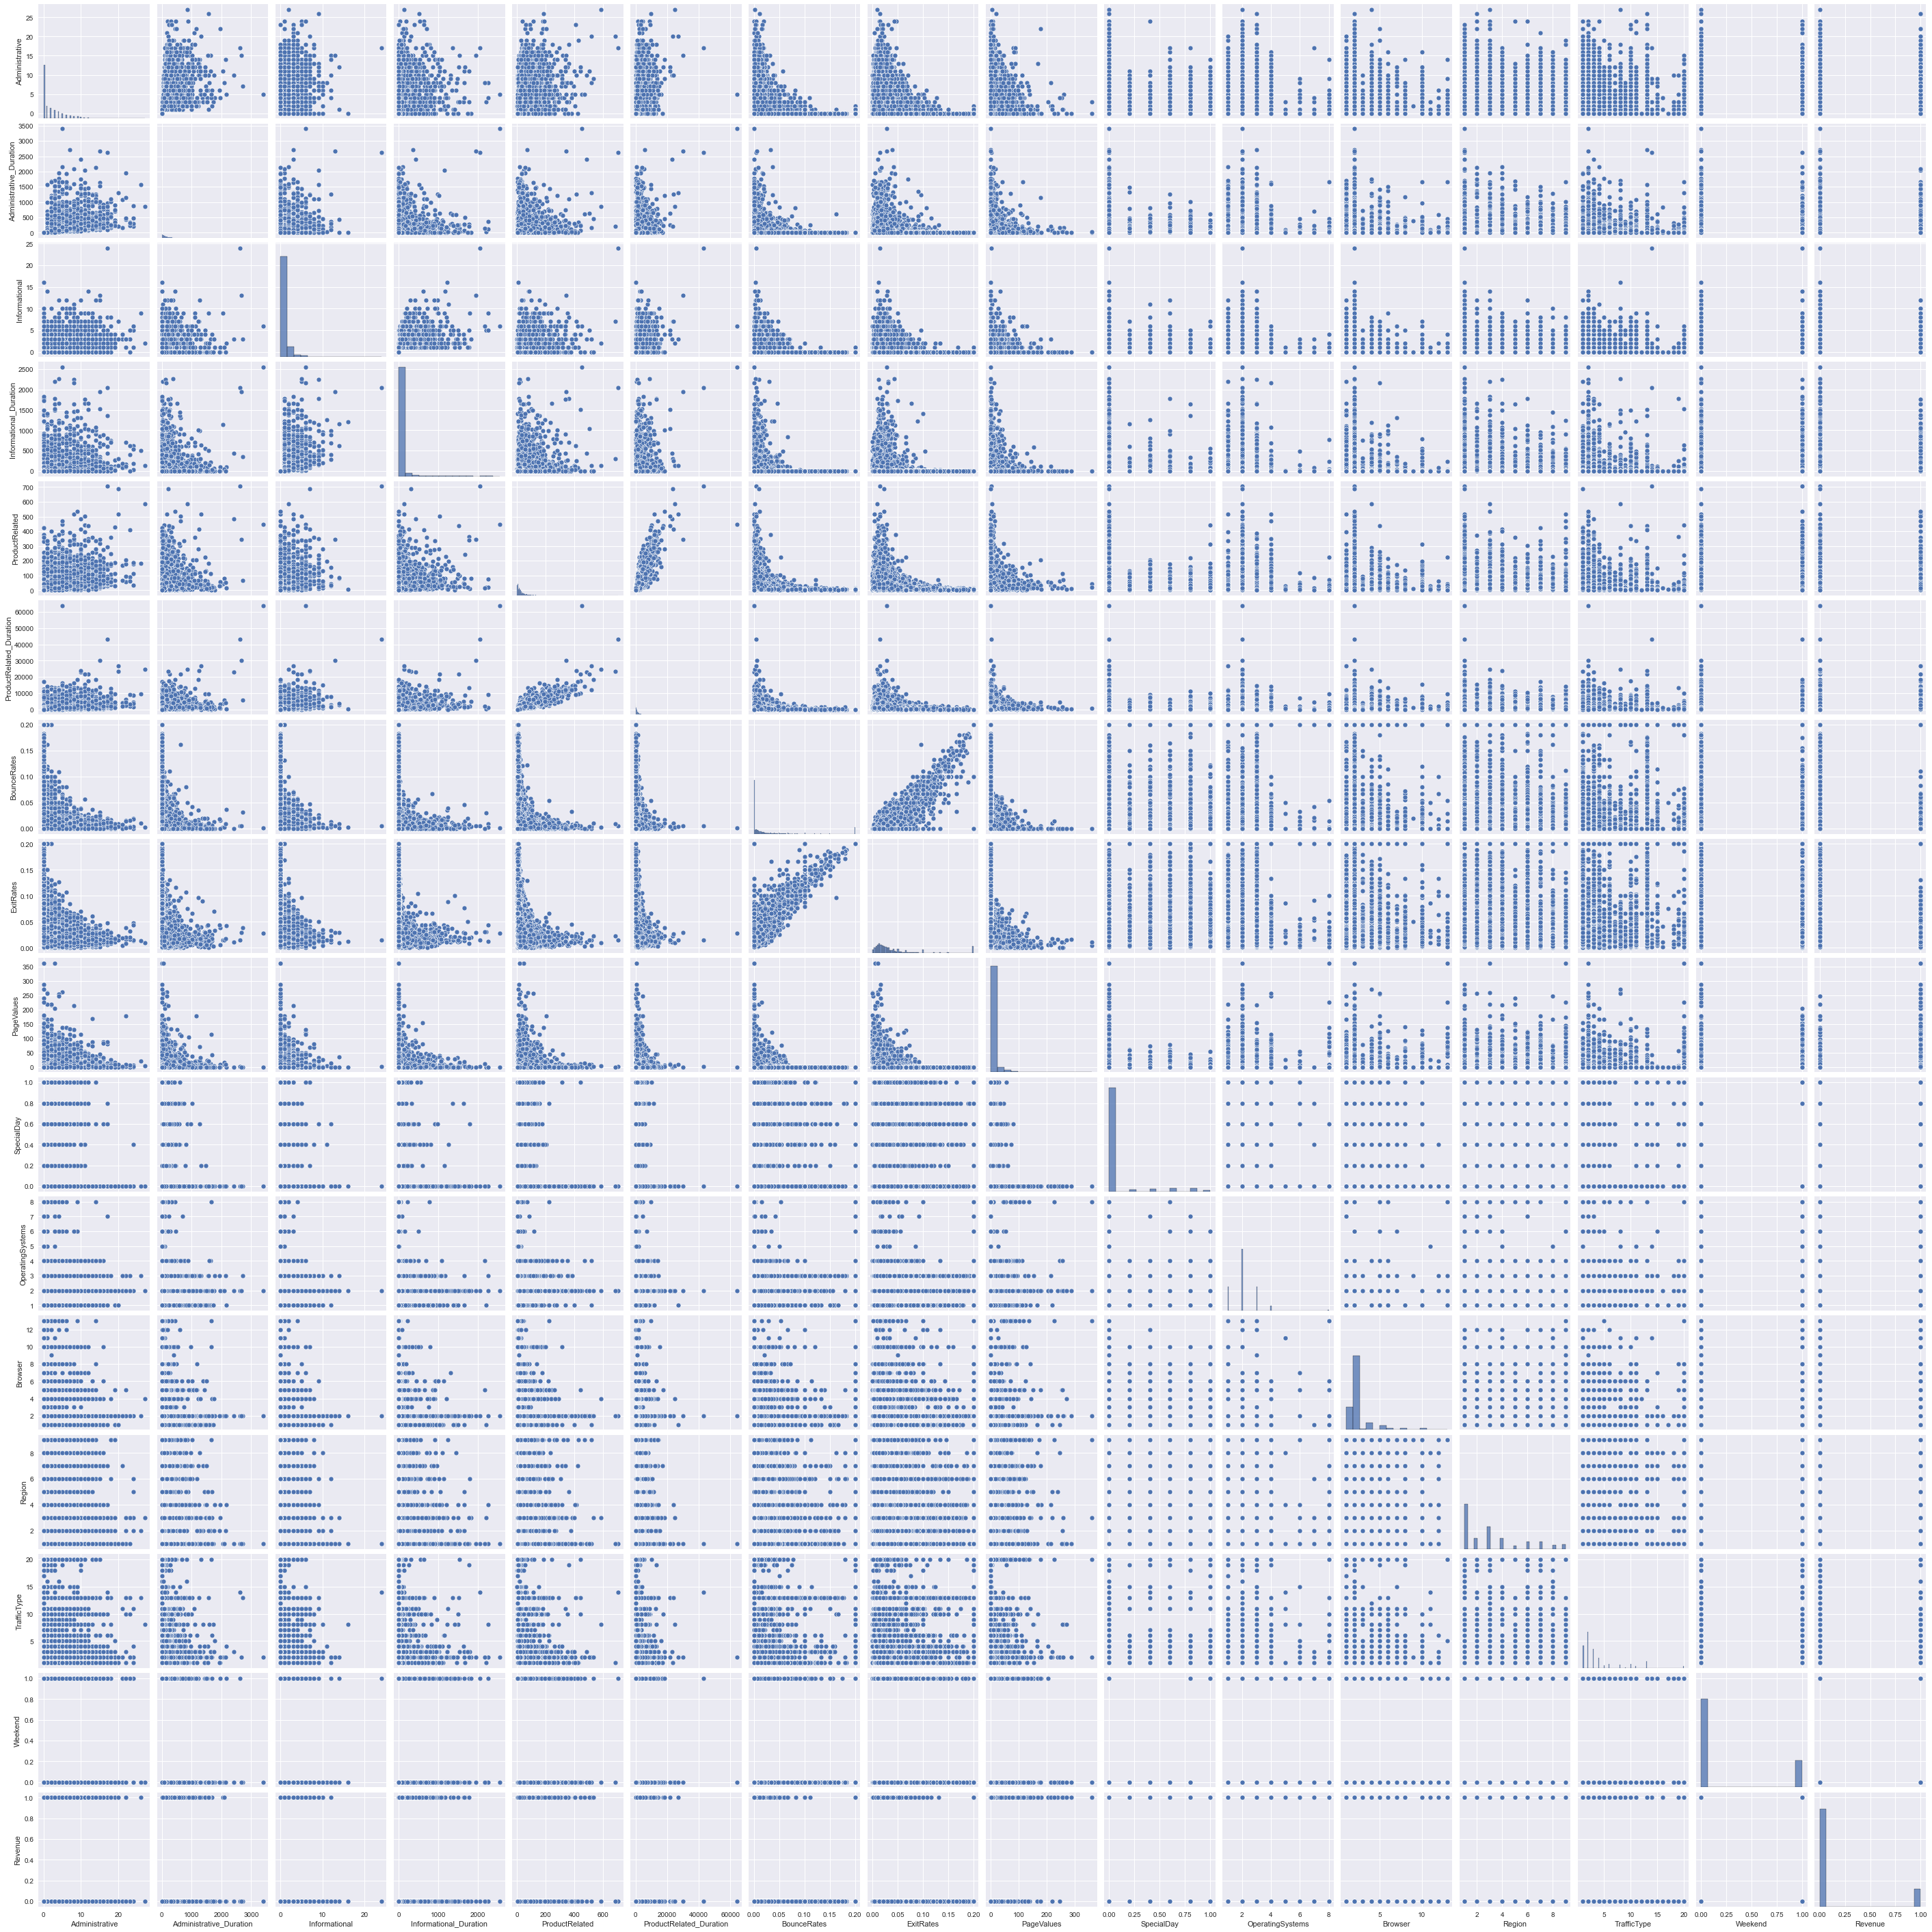

In [36]:
sns.pairplot(data)

In [37]:
print(data.corr())

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561         

KeyboardInterrupt: 

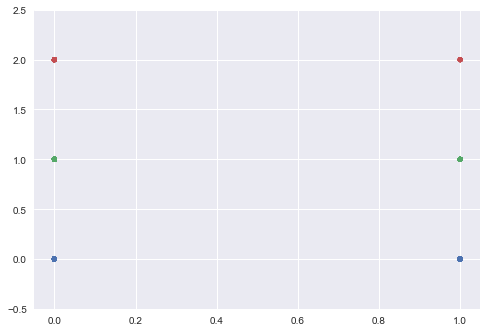

In [38]:
sns.swarmplot(data = data, x='Revenue', y='VisitorType')

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="darkgrid")
sns.countplot(data['Month'],hue=data['VisitorType'],palette='autumn',)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# We see May has the highest number of returning visitors

In [ ]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.countplot(data['Month'],hue=data['SpecialDay'],palette='autumn')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
#Observations.
#1)There are no special days between Aug and Nov
#2)There are many special Days in the month of may
#3)There are very few special days in the month of oct


In [39]:
plot_data_count(data, 'Months')

ValueError: Could not interpret input 'Months'

<Figure size 864x432 with 0 Axes>

In [41]:
data.groupby('Month')['Revenue'].count()

Month
Aug      433
Dec     1727
Feb      184
Jul      432
June     288
Mar     1907
May     3364
Nov     2998
Oct      549
Sep      448
Name: Revenue, dtype: int64

In [42]:
pd.crosstab(data['Revenue'], data['Month'])

Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
Revenue,,,,,,,,,,
False,357,1511,181,366,259,1715,2999,2238,434,362
True,76,216,3,66,29,192,365,760,115,86


In [43]:
data.groupby('Month')['ProductRelated_Duration'].mean()

Month
Aug     1272.653654
Dec     1111.470727
Feb      471.014647
Jul     1217.604028
June    1213.377604
Mar      812.282992
May      981.893060
Nov     1758.397922
Oct     1116.977684
Sep     1253.388150
Name: ProductRelated_Duration, dtype: float64

In [46]:
data.groupby('Weekend')['ProductRelated_Duration'].mean()

Weekend
False    1187.044261
True     1220.156240
Name: ProductRelated_Duration, dtype: float64